**Introducción a la Bioinformática Molecular - 1er cuatrimestre 2025**

# TP1 - Entornos y Primeros Programas

**Luciano Quevedo, Joaquina Cagliero, Hernán Garbarino**

luquevedo.1997@gmail.com, joaquinacagliero@gmail.com, h_garbarino@hotmail.com


## OBJETIVOS

*   Resolver problemas diveros utilizando un lenguaje de programación -Python-
*   Analizar y representar datos visualmente, creando programas y utilizando funcionalidades de bibliotecas prestablecidas.
*   Explorar conceptos de programación típicos asociándolos a problemas bioinformáticos.


## EJERCICIOS

**Bibliotecas necesarias**
- time
- matplotlib
- numpy
- random
- biopython

### Ejercicio 1
- **a)** Obtén todos los números primos del 1 al 20 usando loops y condicionales, e imprímelos.
- **b)** Extiende el código para determinar los números primos hasta un límite definido por el usuario.
-  **c)** Escribir un pseudocódigo que sirva para identificar si un número es primo.
- **d)** Analice la performance en tiempo (¿cuánto tarda su programa?). Use graficos de tiempo
vs número de predicciones.

Para resolver estos problemas se nos ocurrieron varias estrategias. A continuación se definen 3 funciones capaces de resolver el punto **b** (considerando que **a** es un subproblema de **b**). Para no saturar el output, al final de la ejecución de devuelve una lista con todos los primos entre 1 y **n**, en todas las versiones.



In [1]:
def obtener_primos_v1(n):
  Primos = [2] # Arrancamos la lista con un 2, porque si no le estamos pidiendo a la función que empiece a dividir números por una lista vacía
  for i in range (2,n+1): # Usamos una lista especial que NO incluya al 1
    for j in Primos: #Queremos que vaya recorriendo la lista de primos
      if i % j == 0:
        break
    else:
      if i % j != 0:
        Primos.append(i)
  return Primos

def obtener_primos_v2(n):
    primos=[] # Inicializo la lista en la que voy a guardar los primos
    for i in range(2, n + 1): # Itero desde el 2 hasta n (la función range no incluye el último número, por eso se suma 1) para probar en cada caso si i es primo o no
        for j in range(2, i):  # Por cada número i, itero desde 2 hasta i-1, j es un posible divisor de i
            if (i % j) == 0: # Si j efectivamente divide a i, i%0 es 0, lo que significa que i no es primo, por lo que se rompe el ciclo
                break
        else: # Si el ciclo termina normalmente (sin break), significa que no se encontró un divisor, por lo que i es primo
            primos.append(i) # Se agrega i a la lista de primos
            pass
    return primos

def obtener_primos_v3(n): # Esta función es similar a la anterior, pero se incluye un truco matemático para ahorrar tiempo de cómputo
    # En vez de probar si i es divisible por todos los números menores a i, se prueba si es divisible por los números menores a la raíz cuadrada de i
    primos = []
    for i in range(2, n + 1):
        for j in range(2, int(i**0.5) + 1):
            if (i % j) == 0:
                break
        else:
            primos.append(i)
            pass
    return primos

n = 20
print(obtener_primos_v1(n))
print(obtener_primos_v2(n))
print(obtener_primos_v3(n))

[2, 3, 5, 7, 11, 13, 17, 19]
[2, 3, 5, 7, 11, 13, 17, 19]
[2, 3, 5, 7, 11, 13, 17, 19]


Pseudocódigo para identificar si un número **n** es primo

si **n** es igual o menor a 1, entonces **NO es primo**

si **n** es mayor a 1

-si el resto de **n**/i para cualquier i es 0 (con i distinto de 0,1 y **n**), entonces **n NO es primo**

-si el resto de **n**/i para cualquier i es distinto de 0 (con i distinto de 0,1 y **n**), entonces **n SÍ es primo**

Estas funciones cumplen su tarea satisfactoriamente para números pequeños, pero a medida que se aumenta **n** el tiempo de ejecución parece aumentar significativamente. El siguiente punto pone a prueba ésto, ya que se debe medir el tiempo de cómputo para distintos valores de **n** y graficar esta dependencia.
Para medir el tiempo que tarda una linea de código en ejecutarse (como la llamada a una función), puede usarse la función time de la biblioteca con el mismo nombre. Esta función toma una screenshot del tiempo en el momento en que es llamada. Restando el valor de dos llamadas a esta función, con la linea de código cuyo tiempo de ejecución queremos medir en medio de ambas, se puede obtener este valor. Nosotros decidimos crear una funcion (**medir_tiempo**) que tome 2 parámetros: una de las funciones que definimos para imprimir números primos y **n**. El resultado es el tiempo de ejecución de la función en segundos para un **n** dado.

In [2]:
import time
# Se usa perf_counter porque es más preciso que time() para medir tiempos cortos
def medir_tiempo(f,n):
    t0 = time.perf_counter() # Se toma una muestra del tiempo antes de ejecutar la función
    f(n)
    tf = time.perf_counter() # Se toma una muestra del tiempo después de ejecutar la función

    return tf - t0 # Se devuelve la diferencia entre tf y t0, que es el tiempo que tardó en ejecutarse la función
n = 30000
tiempo_ejecucion = medir_tiempo(obtener_primos_v1, n)
print(f"Tiempo de ejecución de obtener_primos_v1 (n = {n}): {tiempo_ejecucion:.3f} s")

Tiempo de ejecución de obtener_primos_v1 (n = 30000): 0.253 s


Se graficó el tiempo de ejecución de las tres funciones en función de **n** para 100 valores equiespaciados de **n** entre 1 y N.

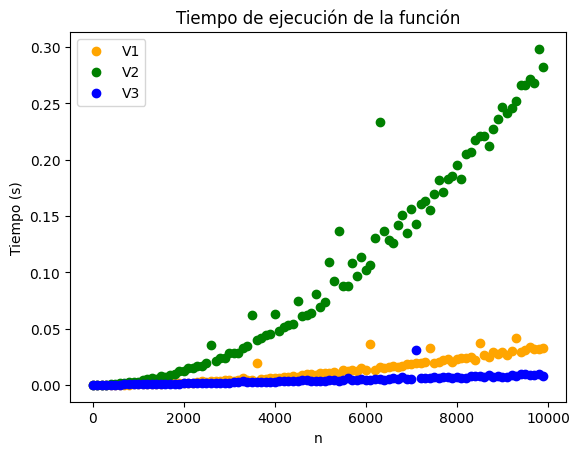

In [3]:
import matplotlib.pyplot as plt
import numpy as np

N = 10000 # Defino el tamaño máximo de n

x = np.arange(1, N+1, N//100) # Genero un array de 100 números equiespaciados entre 1 y N

# Mido el tiempo de ejecución de cada función para cada número de x y lo grafico
y1 = [medir_tiempo(obtener_primos_v1, i) for i in x] #
plt.plot(x, y1, 'o', label='V1', color='orange')
y2 = [medir_tiempo(obtener_primos_v2, i) for i in x]
plt.plot(x, y2, 'o', label='V2',color='green')
y3 = [medir_tiempo(obtener_primos_v3, i) for i in x]
plt.plot(x, y3, 'o', label='V3', color='blue')

plt.xlabel('n')
plt.ylabel('Tiempo (s)')
plt.title('Tiempo de ejecución de la función')
plt.legend()
plt.show()


Como se había notado, el tiempo de ejecución aumenta al aumentar **n**. Al observar el gráfico, sin embargo, vemos que este tiempo no aumenta de igual manera para las tres funciones. Por ejemplo, **V2** (**obtener_primos_v2**) tiene un tiempo de ejecución para todo **n** mayor al de las otras dos funciones, y la dependencia pareciera ser cuadrática. En el caso de las otras dos funciones, no puede observarse bien la dependencia debido a que el rango de tiempo de ejecución de estas es mucho menor al de **V2**. Para analizarlas correctamente, las graficamos aparte en un rango mayor de valores de **n**.

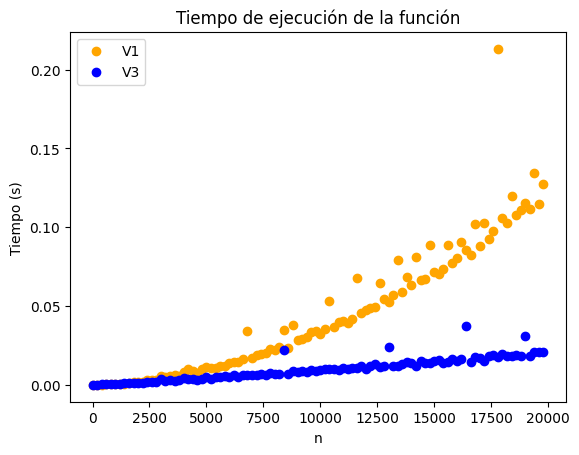

In [4]:
N = 20000

x = np.arange(1, N+1, N//100) # Genero un array de 100 números entre 1 y n
# Mido el tiempo de ejecución de cada función para cada número de x y lo grafico
y1 = [medir_tiempo(obtener_primos_v1, i) for i in x]
plt.plot(x, y1, 'o', label='V1', color='orange')
y3 = [medir_tiempo(obtener_primos_v3, i) for i in x]
plt.plot(x, y3, 'o', label='V3', color='blue')
plt.xlabel('n')
plt.ylabel('Tiempo (s)')
plt.title('Tiempo de ejecución de la función')
plt.legend()
plt.show()

En este gráfico, se puede ver que **V1** también pareciera tener una tendencia cuadrática. En cuanto a **V3**, su tendencia parecería ser lineal (realmente no lo es); Esta versión es la que se optimizó, por lo que es esperable que el tiempo escale más lentamente. Si queremos relacionar estos resultados con la implementación de cada función, tenemos que analizar la estructura de los bucles **for** anidados, en particular debemos prestar atención a cuántas veces se ejecutan las lineas dentro del bucle más interno y como escala este valor al aumentar **n**.

### Ejercicio 2
- Crea un programa que para generar posibles passwords use Nombre, Fecha de nacimiento y DNI. Para ello utilice las herramientas para que el código le pida que ingrese estos datos y le de una clave. Investigue el uso de diccionarios, listas y permutaciones.

*Requisitos: 8 caracteres, al menos 2 letras, 2 números y sin fragmentos del nombre, fecha o DNI.*

Se decidió generar la contraseña a partir de 3 dígitos del dni, 2 letras del nombre y 3 dígitos de la fecha de nacimiento elegidos al azar y luego mezclarlos. De esta forma se cumplen los requisitos establecidos.

In [5]:
import random # Importo una biblioteca útil para randomizar objetos

def generar_contraseña(nombre, fecha_nacimiento, dni):

    # Paso 1: transformar los strings en listas de caracteres para poder randomizarlas con random.shuffle
    nombre_lista = list(nombre)
    fecha_lista = list(fecha_nacimiento)
    dni_lista = list(dni)

    # Paso 2: Randomizo las listas
    random.shuffle(nombre_lista)
    random.shuffle(fecha_lista)
    random.shuffle(dni_lista)

    # Paso 3: elegir los primeros caracteres de cada lista ya mezclada
    fecha_car = fecha_lista[:3]  # 3 dígitos de la fecha
    dni_car = dni_lista[:3]      # 3 dígitos del DNI
    nombre_car = nombre_lista[:2] # 2 caracteres del nombre


    lista_contraseña = fecha_car + dni_car + nombre_car #se unen las 3 listas, obteniendo una lista con 3+3+2=8 caracteres
    random.shuffle(lista_contraseña) # para que no estén todas las letras por un lado y los números por el otro
    contraseña = "".join(lista_contraseña) # para pasar de tener una lista de caracteres a tenerlos todos juntos

    # Paso 3: asegurar que la contrasña no contenga fragmentos de las variables originales

    # Si la contraseña generada tiene fragmentos de alguna de las variables originales (definidos como substrings de tamaño 3 o mayor), se vuelven a mezclar los caracteres
    # (por azar podría pasar que la contraseña generada contenga un fragmento de las variables originales)

    fragmentos_nombre = [nombre[i:i+3] for i in range(len(nombre)-2)] # fragmentos de 3 letras del nombre
    fragmentos_fecha = [fecha_nacimiento[i:i+3] for i in range(len(fecha_nacimiento)-2)] # fragmentos de dígitos de la fecha
    fragmentos_dni = [dni[i:i+3] for i in range(len(dni)-2)] # fragmentos de 3 dígitos del DNI
    fragmentos = fragmentos_nombre + fragmentos_fecha + fragmentos_dni # se unen las listas de fragmentos

    while any(fragmento in contraseña for fragmento in fragmentos): # mientras haya fragmentos de las variables originales en la contraseña generada
        random.shuffle(lista_contraseña)
        contraseña = "".join(lista_contraseña)

    return contraseña

# Se pide al usuario que ingrese su nombre, fecha de nacimiento y DNI como input. La entrada debe ser del tipo:
nombre = input("Ingrese su nombre: ")
f_nacimiento = input("Ingrese su fecha de nacimiento (DD/MM/AAAA): ")
f_nacimiento = f_nacimiento.replace("/", "") # para eliminar las barras de la fecha
dni = input("Ingrese su DNI: ")

# Se prueba la función generando 5 contraseñas
for i in range(5):
    print(generar_contraseña(nombre, f_nacimiento, dni))


# Si alguno de los datos ingresados no es compatible con la función (nombre con menos de 2 letras, DNI con menos de 3 dígitos o entrada tipo 'str', etc ),
# la contraseña generada no va a cumplir con los requisitos o directamente se producirá un error durante la ejecución. El bucle while puede no terminar nunca de ejecutarse
# si los caracteres seleccionados de cada variable no pueden ordenarse sin que haya fragmentos de las variables en la contraseña final.

6227a81n
81520ua6
02820ua5
21704Jn8
a2107u20


### Ejercicio 3

- **a)** Selecciona o crea un archivo de texto y cuenta cuántas veces aparece una palabra dada (ingresada por el usuario).
- **b)** Cuente la frecuencia de cada palabra y luego represente el conteo en una nube de palabras (puede explorar la librería WordCloud o alguna que considere útil).
- **c)** Pruebe el código con algún archivo de texto, ¿para qué podría usar esa representación? ¿le parece necesario excluir alguna palabra para realizar el gráfico? ¿Considera que está usted/el autor del texto sesgado en la utilización de alguna muletilla/palabra al escribir?

La función **contar_palabra** recibe un archivo y una palabra como parámetros, y devuelve su cantidad de apariciones en el archivo de texto.

In [6]:
def contar_palabra(archivo,palabra):
    with open(archivo, "r", encoding="utf-8") as f: # Abro el archivo en modo lectura con with, para que se cierre automáticamente al terminar el bloque
        texto = f.read().lower() # Leo el contenido del archivo y lo convierto a minúsculas para que la búsqueda no distinga entre mayúsculas y minúsculas
        texto_sin_signos =  "".join(caracter for caracter in texto if caracter.isalnum() or caracter.isspace()) # Elimino los signos de puntuación y caracteres especiales del texto

    palabras = texto_sin_signos.split() # Separo el texto en palabras usando el espacio como separador
    frecuencia = palabras.count(palabra.lower()) # Cuento cuántas veces aparece la palabra en la lista de palabras
    return frecuencia

archivo = "funes_el_memorioso.txt"
palabra = "recuerdos"
print(contar_palabra(archivo, palabra))

5


Para realizar el punto **b)** se podría reutilizar **contar_palabra**, pero como esta función abre el archivo cada vez que cuenta una palabra, puede optimizarse el proceso de contar múltiples palabras creando una función en la que se abra una sola vez el archivo y se cuenten las apariciones de todas las palabras de una vez. Esto es lo que hace la función **contar_palabras**, que devuelve un diccionario donde cada clave corresponde a una palabra y el valor a su número de apariciones.

Para generar el gráfico **bag of words** (muestra todas las palabras de un texto en un gráfico, donde el tamaño de la palabra está asociado a su cantidad de repeticiones) se utilizó la función WordCloud de la biblioteca wordcloud y matplotlib. Se eligió como texto un archivo de texto plano que contiene el cuento Funes el memorioso de Jorge Luis Borges.

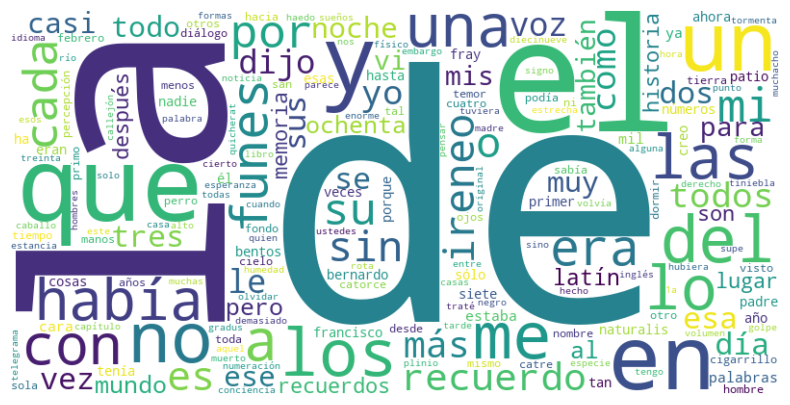

In [7]:
def contar_palabras(archivo):
    with open(archivo, "r", encoding="utf-8") as f:
        texto = f.read().lower()
        texto_sin_signos =  "".join(caracter for caracter in texto if caracter.isalnum() or caracter.isspace())

    palabras = texto_sin_signos.split()

    frecuencias = {}
    for palabra in set(palabras): # Uso set para contar la cantidad de apariciones de cada palabra una sola vez
        frecuencias[palabra] = palabras.count(palabra.lower())

    return frecuencias

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Función que genera una nube de palabras a partir de un diccionario de frecuencias
def generar_nube_palabras(frecuencias):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frecuencias)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

archivo = "funes_el_memorioso.txt"
conteo = contar_palabras(archivo)

generar_nube_palabras(conteo)

Excluiría palabras dependiendo de mi objetivo. Dado que las palabras que más aparecen, como era de esperarse, son artículos y conectores al igual que en la mayoría de textos; Si uno quisiera caracterizar mejor el significado/ la información que contiene, estaría más interesado en otro tipo de palabras, como sustantivos o adjetivos calificativos. Existen colecciones/bases de datos con palabras utilizadas frecuentemente en cada idioma, que son empleadas por ejemplo para análisis de texto en lingüística. En nuestro caso, seleccionaremos a ojo las palabras que más aparecen y no son de "importancia" para eliminarlas y generar otra función para contar palabras.

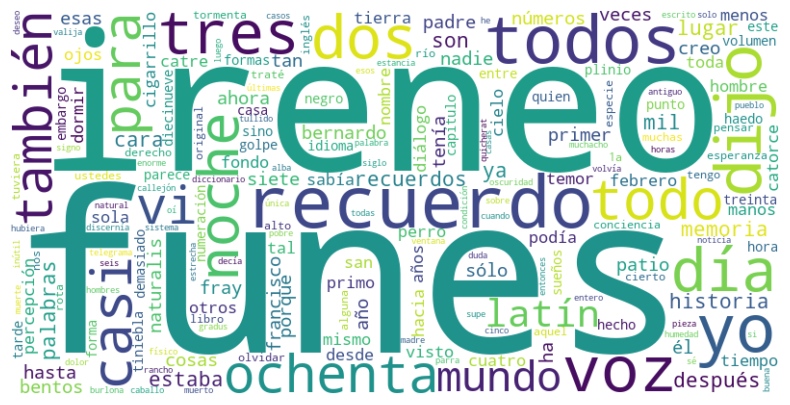

In [13]:
def contar_palabras_v2(archivo):
    with open(archivo, "r", encoding="utf-8") as f:
        texto = f.read().lower()
        texto_sin_signos =  "".join(caracter for caracter in texto if caracter.isalnum() or caracter.isspace())
    palabras = texto_sin_signos.split()

    palabras_a_excluir = ["el", "la", "los", "las", "de", "y", "a", "en", "o", "más",
                          "que", "es", 'su', 'a', 'mi', 'una', 'un', 'me', "con",
                          'mi', 'esa', "del", "no", "como", "lo", "por", "había", "mis",
                          "con", "cada", "era", "le", "sin", "pero", "otro" , "vez",
                          "se", "al", "ni", "sus", "ese", "muy", "eran"] # Palabras a excluir del conteo
    palabras = list(filter(lambda palabra: palabra not in palabras_a_excluir, palabras)) # Se filtran las palabras a excluir usando una función lambda

    frecuencias = {}
    for palabra in set(palabras): # Uso set para contar la cantidad de apariciones de cada palabra una sola vez
        frecuencias[palabra] = palabras.count(palabra.lower())

    return frecuencias


archivo = "funes_el_memorioso.txt"
conteo = contar_palabras_v2(archivo)

generar_nube_palabras(conteo)

En este caso se puede tener una mejor idea del carácter del texto. Por ejemplo, se puede ver como suele repetir el nombre del protagonista "Ireneo Funes", algo típico de su estilo.

### Ejercicio 4

- **a)** ¿Qué características tiene una base de datos primaria? ¿Qué querría buscar en ellas ?
- **b)** Usando información de https://biopython.org/docs/dev/Tutorial/chapter_entrez.html, construya un programa que baje un registro de una base de datos usando palabras clave (autor, año, revista, base de datos, etc).
- **c)** Buscar palabras clave dentro de esos registros ¿Qué campos tiene ese registro ?

Una base de datos primaria es aquella que contiene datos obtenidos directamente de la fuente, sin ningún tipo de procesamiento o transformación. Por ejemplo información de secuencias de ADN obtenida a partir de un experimento de laboratorio. En una base de datos de este tipo, podrían buscarse datos para analizar/procesar de una manera distinta a la que lo hicieron quienes obtuvieron los datos originalmente o integrarlos a otros datos para expandir una base de datos.

A continuación se define una función capaz de encontrar registros (artículos científicos) en la base de datos PubMed, filtrando con palabras clave sobre distintos campos. Al igual que en la página web...

 A continuación se define una función capaz de encontrar registros (artículos científicos) en la base de datos PubMed, filtrando con palabras clave sobre distintos campos. Al igual que en la página web de NCBI, se pueden buscar artículos utilizando operaciones lógicas; En nuestro ejemplo, se buscan todas las publicaciones que contienen en el título 'deep learning' Y 'phenotype prediction' Y que son del año 2025:

**"deep learning[Title] AND prediction[Title] AND 2025[Date - Publication]"**

 A este string de consulta se lo llama **query**.

 Para llevar a cabo esta búsqueda, utilizamos Entrez y Medline, herramientas incluidas en la biblioteca Biopython. Entrez es una API (Application Programming Interface) que permite realizar búsquedas, recuperar datos y navegar entre registros de las bases de NCBI; Medline parsea los registros que devuelve Entrez a un formato estandarizado para representar metadatos de publicaciones científica, facilitando la extracción de los valores de cada campo de un registro.

In [1]:
from Bio import Entrez, Medline

Entrez.email = "tu_correo@example.com"

# Función para buscar artículos en PubMed usando la API de NCBI
def buscar_pubmed(query, n):

    # Se buscan hasta n IDs usando la query ingresada
    handle = Entrez.esearch(db="pubmed", term=query, retmax=n)
    record = Entrez.read(handle)
    handle.close()

    # Se obtienen los IDs de los artículos encontrados y se insertan en una lista
    id_list = record['IdList']
    if not id_list:
        return "No se encontraron resultados."

    # Se obtienen los registros en formato Medline
    handle = Entrez.efetch(db="pubmed", id=",".join(id_list), rettype="medline", retmode="text")
    records = Medline.parse(handle)

    # Se itera sobre los registros (cada uno es un diccionario), imprimiendo el título y la fecha de publicación de cada uno
    for i, rec in enumerate(records):
        print(f'Registro nº{i+1}:')
        print(f"Título: {rec['TI']}") # Extraigo el título del artículo con la clave 'TI'
        print(f"Fecha de publicación: {rec['DP']}\n") # Extraigo la fecha de publicación con la clave 'DP'



    handle.close()

query = "deep learning[Title] AND prediction[Title] AND 2025[Date - Publication]"
n = 5 # Número de artículos a buscar
buscar_pubmed(query, n)


Registro nº1:
Título: CT-based radiomics deep learning signatures for non-invasive prediction of metastatic potential in pheochromocytoma and paraganglioma: a multicohort study.
Fecha de publicación: 2025 Apr 5

Registro nº2:
Título: Deep learning prediction of mammographic breast density using screening data.
Fecha de publicación: 2025 Apr 4

Registro nº3:
Título: Improved deep learning model for accurate energy demand prediction and conservation in electric vehicles integrated with cognitive radio networks.
Fecha de publicación: 2025 Apr 4

Registro nº4:
Título: An interpretable deep learning model for the accurate prediction of mean fragmentation size in blasting operations.
Fecha de publicación: 2025 Apr 3

Registro nº5:
Título: Data imbalance in drug response prediction: multi-objective optimization approach in deep learning setting.
Fecha de publicación: 2025 Mar 4



Para saber qué campos tiene un registro, podemos mostrar las claves del diccionario generado por Medline.
Como las claves están representadas por 2 o 3 letras, es útil consultar la documentación oficial (https://biopython.org/docs/1.75/api/Bio.Medline.html). Algunas claves importantes son:

| Clave | Descripción                          |
|--------|--------------------------------------|
| PMID   | Identificador único de PubMed.       |
| TI     | Título del artículo.                 |
| AB     | Resumen del artículo.                |
| AU     | Lista de autores.                    |
| FAU    | Nombre completo de los autores.      |
| AD     | Afiliación de los autores.           |
| DP     | Fecha de publicación.                |

A continuación, se imprimirán todas las claves disponibles para el primer registro encontrado con el query ya mencionado.

In [10]:
# Buscar 1 ID que cumplan la consulta
handle = Entrez.esearch(db="pubmed", term=query, retmax=1)
registro = Entrez.read(handle)
handle.close()

pmid = registro['IdList'][0]

# Obtener el registro en formato Medline
handle = Entrez.efetch(db="pubmed", id=pmid, rettype="medline", retmode="text")
records = Medline.parse(handle)
primer_registro = next(records)
handle.close()

print(primer_registro.keys()) # Se imprimen todas las claves del primer registro


dict_keys(['PMID', 'OWN', 'STAT', 'LR', 'IS', 'VI', 'IP', 'DP', 'TI', 'PG', 'LID', 'AB', 'CI', 'FAU', 'AU', 'AD', 'LA', 'GR', 'PT', 'DEP', 'PL', 'TA', 'JT', 'JID', 'SB', 'OTO', 'OT', 'COIS', 'EDAT', 'MHDA', 'CRDT', 'PHST', 'AID', 'PST', 'SO'])


## CONCLUSIONES

A lo largo de este trabajo se abordaron temáticas clásicas de programación. En el problema de obtener todos los números primos en un rango acotado entre 1 y n, se introdujo el concepto de complejidad. Se analizó la eficiencia de los algoritmos propuestos, caracterizando su dependencia con n. Al comparar distintas implementaciones para resolver el mismo problema, observamos que un algoritmo mal diseñado puede consumir mucho tiempo y recursos, sobre todo al aumentar la cantidad de números o variables a analizar. Por lo tanto, destacamos la importancia de diseñar soluciones eficientes, especialmente cuando se trata de problemas cuya complejidad escala rápidamente si no se los trata cuidadosamente.

En el ejercicio de generación de contraseñas observamos que siempre que el usuario respete las condiciones de entrada establecidas (que el DNI esté conformado por números, el string por letras, etc), el algoritmo garantiza devolver una respuesta adecuada. Esta idea es esencial para el diseño de programas confiables. Teniendo en cuenta que la bioinformática desarrolla programas utilizados para la investigación científica, se debe asegurar que el desarrollo cumpla con estándares rigurosos de validación y manejo de errores. Un pequeño fallo en la entrada o en la lógica del código puede llevar a interpretaciones incorrectas de los datos biológicos, lo que podría afectar la reproducibilidad y validez de los resultados.

En el caso del análisis de textos mediante la técnica de "bag of words", se identificó la relevancia del pre-procesamiento de datos. Eliminar artículos, conectores y palabras sin valor informativo mejoró la calidad de la representación brindando una imagen más significativa. Este paso es fundamental en ciencia y otras disciplinas que trabajan con grandes volúmenes de texto, secuencias u otro tipo de datos. Limpiarlos y prepararlos adecuadamente para su análisis suele consumir una gran cantidad de tiempo y puede marcar una amplia diferencia en los resultados.

Por último, se logró desarrollar un pequeño programa mediante el cual buscar artículos científicos de *Pubmed* según un query ingresado. Por ejemplo, se pueden buscar aquellos artículos que contengan una palabra clave dada en el campo **Título**. La búsqueda de datos es esencial en toda etapa de investigación científica: ya sea para informarse sobre un tema, obtener datos específicos para analizar, o comparar resultados propios con información previamente documentada. El acceso automatizado a estas bases de datos permite agilizar los procesos de búsqueda y análisis, reduciendo errores humanos y facilitando la integración de datos en flujos de trabajo más amplios.

Todos los conceptos tratados, son comunes a todas las ciencias de datos y no particulares de la bioinformática. Por lo que es de gran importancia familiarizarse con las ideas básicas de la computación y programación, además de la utilización de recursos que ya fueron creados por otros desarrolladores. Respecto a esto útlimo, por ejemplo, utilizamos en este trabajo **biopython**, una biblioteca que facilita inmensamente el análisis y acceso de/a información biológica. Como esta herramienta existen muchas otras, creadas por la comunidad científica en respuesta a el aumento en la necesidad de procesamiento de datos biológicos, que son utilizadas extensamente.